# HEART FAILURE PREDICTION USING MACHINE LEARNING

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Import Dataset

In [2]:
data = pd.read_csv('heart_failure.csv')

In [3]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Exploring the dataset

In [4]:
data.shape

(299, 13)

In [5]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [9]:
data.size

3887

In [10]:
data.value_counts()

age   anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  smoking  time  DEATH_EVENT
40.0  0        90                        0         35                 0                    255000.0   1.1               136           1    1        212   0              1
65.0  1        160                       1         20                 0                    327000.0   2.7               116           0    0        8     1              1
               128                       1         30                 1                    297000.0   1.6               136           0    0        20    1              1
               113                       1         60                 1                    203000.0   0.9               140           0    0        94    0              1
               68                        1         60                 1                    304000.0   0.8               140           1    0        79

## Preprocessing

#### checking for missing values

In [11]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

#### Handling Categorical Variables

In [12]:
data = pd.get_dummies(data, columns=['platelets'], drop_first=True)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,...,platelets_461000.0,platelets_481000.0,platelets_497000.0,platelets_504000.0,platelets_507000.0,platelets_533000.0,platelets_543000.0,platelets_621000.0,platelets_742000.0,platelets_850000.0
0,75.0,0,582,0,20,1,1.9,130,1,0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,0,7861,0,38,0,1.1,136,1,0,...,0,0,0,0,0,0,0,0,0,0
2,65.0,0,146,0,20,0,1.3,129,1,1,...,0,0,0,0,0,0,0,0,0,0
3,50.0,1,111,0,20,0,1.9,137,1,0,...,0,0,0,0,0,0,0,0,0,0
4,65.0,1,160,1,20,0,2.7,116,0,0,...,0,0,0,0,0,0,0,0,0,0


## Exploratory Data Analysis

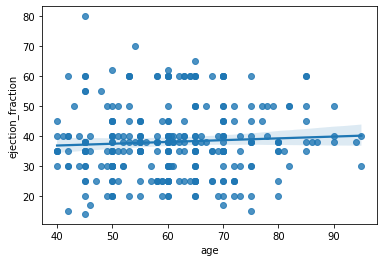

In [13]:
sns.regplot(x='age', y='ejection_fraction', data=data)
plt.show()

## Extract X and Y

In [16]:
X = data.drop("DEATH_EVENT", axis=1)
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium,sex,smoking,...,platelets_461000.0,platelets_481000.0,platelets_497000.0,platelets_504000.0,platelets_507000.0,platelets_533000.0,platelets_543000.0,platelets_621000.0,platelets_742000.0,platelets_850000.0
0,75.0,0,582,0,20,1,1.9,130,1,0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,0,7861,0,38,0,1.1,136,1,0,...,0,0,0,0,0,0,0,0,0,0
2,65.0,0,146,0,20,0,1.3,129,1,1,...,0,0,0,0,0,0,0,0,0,0
3,50.0,1,111,0,20,0,1.9,137,1,0,...,0,0,0,0,0,0,0,0,0,0
4,65.0,1,160,1,20,0,2.7,116,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,1.1,143,1,1,...,0,0,0,0,0,0,0,0,0,0
295,55.0,0,1820,0,38,0,1.2,139,0,0,...,0,0,0,0,0,0,0,0,0,0
296,45.0,0,2060,1,60,0,0.8,138,0,0,...,0,0,0,0,0,0,0,0,1,0
297,45.0,0,2413,0,38,0,1.4,140,1,1,...,0,0,0,0,0,0,0,0,0,0


In [17]:
y = data['DEATH_EVENT']
y

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

## Split the data into training set and testing set using train_test_split

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Train and Evaluate Several Machine Learning Models

### Model 1: Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model2= LogisticRegression()
model2.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model 2: DecisionTreeClassifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
model3 = DecisionTreeClassifier()
model3.fit(X_train,y_train)

DecisionTreeClassifier()

### Model 3: RandomForestClassifier

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
model4 = RandomForestClassifier()
model4.fit(X_train,y_train)

RandomForestClassifier()

### Model 4: SVM

In [27]:
from sklearn.svm import SVC

In [28]:
model5 = SVC()
model5.fit(X_train,y_train)

SVC()

## Predictions 

In [30]:
y_pred2= model2.predict(X_test).round()

In [31]:
y_pred3=model3.predict(X_test).round()

In [32]:
y_pred4= model4.predict(X_test).round()

In [33]:
y_pred5= model5.predict(X_test).round()

## Evaluate Models

### Model 1: Logistic Regression

In [37]:
print(model2.__class__.__name__)
print("Accuracy:", accuracy_score(y_test, y_pred2))
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print("="*50)

LogisticRegression
Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

           0       0.74      0.95      0.83        57
           1       0.88      0.55      0.68        42

    accuracy                           0.78        99
   macro avg       0.81      0.75      0.75        99
weighted avg       0.80      0.78      0.77        99

[[54  3]
 [19 23]]


### Model 2: DecisionTreeClassifier

In [38]:
print(model3.__class__.__name__)
print("Accuracy:", accuracy_score(y_test, y_pred3))
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print("="*50)

DecisionTreeClassifier
Accuracy: 0.7171717171717171
              precision    recall  f1-score   support

           0       0.70      0.88      0.78        57
           1       0.75      0.50      0.60        42

    accuracy                           0.72        99
   macro avg       0.73      0.69      0.69        99
weighted avg       0.72      0.72      0.70        99

[[50  7]
 [21 21]]


### Model 3: RandomForestClassifier

In [39]:
print(model4.__class__.__name__)
print("Accuracy:",accuracy_score(y_test, y_pred4 ))
print(classification_report(y_test, y_pred4))
print(confusion_matrix(y_test, y_pred4))
print("="*50)

RandomForestClassifier
Accuracy: 0.7575757575757576
              precision    recall  f1-score   support

           0       0.73      0.93      0.82        57
           1       0.85      0.52      0.65        42

    accuracy                           0.76        99
   macro avg       0.79      0.73      0.73        99
weighted avg       0.78      0.76      0.74        99

[[53  4]
 [20 22]]


### Model 4: SVM

In [40]:
print(model5.__class__.__name__)
print("Accuracy:", accuracy_score(y_test, y_pred5))
print(classification_report(y_test, y_pred5))
print(confusion_matrix(y_test, y_pred5))
print("="*50)

SVC
Accuracy: 0.5858585858585859
              precision    recall  f1-score   support

           0       0.58      1.00      0.74        57
           1       1.00      0.02      0.05        42

    accuracy                           0.59        99
   macro avg       0.79      0.51      0.39        99
weighted avg       0.76      0.59      0.44        99

[[57  0]
 [41  1]]
